In [1]:
%pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375569 sha256=f095858266f336c6b2c028d329505617eea91ba45ff724f4a4d282d548f01ca6
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

In [3]:
# Start the H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkx9a209z
  JVM stdout: /tmp/tmpkx9a209z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkx9a209z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_fecqcl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
# Import dataset into H2O
data = h2o.import_file("/content/car_insurance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data.types

{'id': 'int',
 'age': 'int',
 'gender': 'int',
 'driving_experience': 'enum',
 'education': 'enum',
 'income': 'enum',
 'credit_score': 'real',
 'vehicle_ownership': 'int',
 'vehicle_year': 'enum',
 'married': 'int',
 'children': 'int',
 'postal_code': 'int',
 'annual_mileage': 'int',
 'vehicle_type': 'enum',
 'speeding_violations': 'int',
 'duis': 'int',
 'past_accidents': 'int',
 'outcome': 'int'}

In [6]:
data.describe()

Rows:10000
Cols:18

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
type,int,int,int,enum,enum,enum,real,int,enum,int,int,int,int,enum,int,int,int,int
mins,101.0,0.0,0.0,,,,0.0533575454627435,0.0,,0.0,0.0,10238.0,2000.0,,0.0,0.0,0.0,0.0
mean,500521.9068,1.4894999999999996,0.499,,,,0.5158128096027912,0.697,,0.4982,0.6888,19864.548399999996,11697.003206900361,,1.4829,0.2392,1.0562999999999996,0.3133
maxs,999976.0,3.0,1.0,,,,0.9608188278116948,1.0,,1.0,1.0,92101.0,22000.0,,22.0,6.0,15.0,1.0
sigma,290030.7687578594,1.025277947430329,0.5000240018241525,,,,0.13768808933113186,0.459578199235039,,0.5000217617026459,0.4630075567415287,18915.61385472878,2818.4345283017865,,2.2419657069239713,0.5549902354241394,1.6524537422684589,0.4638584120856776
zeros,0,2016,5010,,,,0,3030,,5018,3112,0,0,,5028,8118,5584,6867
missing,0,0,0,0,0,0,982,0,0,0,0,0,957,0,0,0,0,0
0,569520.0,3.0,0.0,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0.0,0.0,0.0
1,750365.0,0.0,1.0,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0.0,0.0,1.0
2,199901.0,0.0,0.0,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0.0,0.0,0.0


In [7]:
response = "outcome"
predictors = data.columns
predictors.remove(response)

data[response] = data[response].asfactor()

In [8]:
# Split the dataset into train and test
train, test = data.split_frame(ratios=[.8], seed=1234)

## Default H2OAutoML
Using the H2OAutoML tool with no specified parameter

In [9]:
aml1 = H2OAutoML(seed=1234)

In [10]:
aml1.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/209
# GBM base models (used / total),6/83
# XGBoost base models (used / total),3/111
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/12
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [11]:
aml1.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_4_AutoML_1_20240825_103342,0.919887,0.330167,0.829988,0.160455,0.323917,0.104922
StackedEnsemble_BestOfFamily_4_AutoML_1_20240825_103342,0.919718,0.330591,0.828534,0.156896,0.323924,0.104927
GBM_grid_1_AutoML_1_20240825_103342_model_51,0.919539,0.333431,0.829463,0.158205,0.323955,0.104947
GBM_grid_1_AutoML_1_20240825_103342_model_18,0.919398,0.33333,0.82841,0.160288,0.324678,0.105416
StackedEnsemble_AllModels_3_AutoML_1_20240825_103342,0.919373,0.331201,0.828399,0.16158,0.324257,0.105143
GBM_grid_1_AutoML_1_20240825_103342_model_55,0.918707,0.334568,0.826993,0.159689,0.324799,0.105495
GBM_grid_1_AutoML_1_20240825_103342_model_53,0.918585,0.335069,0.827739,0.161887,0.325273,0.105803
GBM_grid_1_AutoML_1_20240825_103342_model_45,0.918341,0.334702,0.828379,0.158054,0.325627,0.106033
GBM_grid_1_AutoML_1_20240825_103342_model_78,0.917998,0.335292,0.827416,0.159488,0.325312,0.105828
XGBoost_grid_1_AutoML_1_20240825_103342_model_18,0.917848,0.334465,0.824068,0.159942,0.326436,0.10656


In [12]:
aml1.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/209
# GBM base models (used / total),6/83
# XGBoost base models (used / total),3/111
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/12
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [13]:
aml1.leader.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_4_AutoML_1_20240825_103342',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_4_AutoML_1_20240825_103342'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240825_103342_training_py_3_sid_a2ee',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240825_103342_training_py_3_sid_a2ee'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240825_103342_training_py_3_sid_a2ee',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240825_103342_training_py_3_sid_a2ee'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

## H2OAutoML with 10 max models
Using the H2OAutoML with the parameter : max_models=10

In [14]:
aml2 = H2OAutoML(
    max_models=10,
    seed=1234,
)

In [15]:
aml2.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [16]:
aml2.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20240825_113411,0.916652,0.336503,0.820127,0.156985,0.326569,0.106647
StackedEnsemble_BestOfFamily_1_AutoML_2_20240825_113411,0.916648,0.336726,0.817977,0.155622,0.326607,0.106672
GBM_2_AutoML_2_20240825_113411,0.914154,0.342565,0.814989,0.158377,0.328392,0.107841
XGBoost_3_AutoML_2_20240825_113411,0.913282,0.343576,0.815895,0.16216,0.330341,0.109125
GBM_3_AutoML_2_20240825_113411,0.912957,0.344718,0.815007,0.16291,0.330081,0.108954
GBM_1_AutoML_2_20240825_113411,0.911298,0.346878,0.816462,0.170306,0.332597,0.110621
GBM_4_AutoML_2_20240825_113411,0.909647,0.351914,0.806007,0.167547,0.333586,0.11128
DRF_1_AutoML_2_20240825_113411,0.904123,0.407126,0.79784,0.166991,0.33763,0.113994
GLM_1_AutoML_2_20240825_113411,0.903153,0.36159,0.802573,0.174575,0.336273,0.113079
XGBoost_1_AutoML_2_20240825_113411,0.902872,0.365863,0.792255,0.176462,0.34239,0.117231


In [17]:
aml2.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## H2OAutoML with 20 max models
Using the H2OAutoML with the parameter : max_models=**20**

In [18]:
aml3 = H2OAutoML(
    max_models=20,
    seed=1234,
)

In [19]:
aml3.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/20
# GBM base models (used / total),4/7
# XGBoost base models (used / total),2/6
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),2/4
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [20]:
aml3.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_3_20240825_113643,0.917484,0.335156,0.819553,0.157472,0.326103,0.106343
StackedEnsemble_BestOfFamily_1_AutoML_3_20240825_113643,0.916822,0.336303,0.819883,0.158507,0.326835,0.106821
GBM_grid_1_AutoML_3_20240825_113643_model_2,0.916153,0.339566,0.819942,0.158628,0.327943,0.107547
GBM_5_AutoML_3_20240825_113643,0.915914,0.339956,0.817136,0.15581,0.328039,0.10761
GBM_2_AutoML_3_20240825_113643,0.914154,0.342565,0.814989,0.158377,0.328392,0.107841
XGBoost_3_AutoML_3_20240825_113643,0.913282,0.343576,0.815895,0.16216,0.330341,0.109125
GBM_3_AutoML_3_20240825_113643,0.912957,0.344718,0.815007,0.16291,0.330081,0.108954
XGBoost_grid_1_AutoML_3_20240825_113643_model_2,0.911561,0.346675,0.812247,0.169028,0.33286,0.110796
GBM_1_AutoML_3_20240825_113643,0.911298,0.346878,0.816462,0.170306,0.332597,0.110621
XGBoost_grid_1_AutoML_3_20240825_113643_model_3,0.910572,0.349737,0.807173,0.162299,0.333423,0.111171


In [21]:
aml3.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/20
# GBM base models (used / total),4/7
# XGBoost base models (used / total),2/6
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),2/4
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


## H2OAutoML with 10 max models and chosen algorithms
Using the H2OAutoML with the parameters : max_models=10 and include_algo=["GLM", "GBM", "XGBoost"]

In [22]:
include_algos = ["GLM", "GBM", "XGBoost"]
aml4 = H2OAutoML(
    max_models=10,
    seed=1234,
    include_algos=include_algos
)

In [23]:
aml4.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_4_20240825_115717


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    49                 49                          38037                  6            6            6             39            64            57.2041

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07959926507931925
RMSE: 0.28213341716166707
LogLoss: 0.2637031624294095
Mean Per-Class Error: 0.11827713285717005
AUC: 0.9563462994868257
AUCPR: 0.9082456831309828
Gini: 0.9126925989736514

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40819407811368275
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4943  585   0.1058   (585.0/5528.0)
1      328   2181  0.1307   (328.0/2509.0)
Total  5271  2766  0.1136   (913.0/8037.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.408194     0.826919  207
max f2                       0.181584     0.880831  288
max f0point5                 0.623541     0.846211  135
max accuracy                 0.519863     0.89287   170
max precision                0.963008     1         0
max recall                   0.0464001    1         360
max specificity              0.963008     1         0
max absolute_mcc             0.514776     0.748139  172
max min_per_class_accuracy   0.381816     0.882236  217
max mean_per_class_accuracy  0.324212     0.885605  236
max tns                      0.963008     5528      0
max fns                      0.963008     2508      0
max fps                      0.0102364    5528      399
max tps                      0.0464001    2509      360
max tnr                      0.963008     1         0
max fnr                      0.963008     0.999601  0
max fpr                      0.0102364    1         399
max tpr                      0.0464001    1         360

Gains/Lift Table: Avg response rate: 31.22 %, avg score: 31.22 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100784                   0.942672           3.20327    3.20327            1                0.947039   1                           0.947039            0.0322838       0.0322838                  220.327   220.327            0.0322838
2        0.0200324                   0.937021           3.20327    3.20327            1                0.939692   1                           0.943389            0.0318852       0.064169                   220.327   220.327            0.064169
3        0.0301107                   0.930712           3.20327    3.20327            1                0.933915   1                           0.940218            0.0322838       0.0964528                  220.327   220.327            0.0964528
4        0.0400647                   0.924459           3.12319    3.18337            0.975            0.927812   0.993789                    0.937135            0.0310881       0.127541                   212.319   218.337            0.127179
5        0.0500187                   0.915892           3.12319    3.17139            0.975            0.920371   0.99005                  

In [24]:
aml4.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_4_20240825_115717,0.916137,0.339666,0.818715,0.158621,0.32783,0.107473
GBM_2_AutoML_4_20240825_115717,0.913932,0.342955,0.819126,0.162949,0.329185,0.108363
GBM_3_AutoML_4_20240825_115717,0.912732,0.345731,0.816275,0.162474,0.330369,0.109143
XGBoost_3_AutoML_4_20240825_115717,0.912593,0.344937,0.814702,0.161831,0.330733,0.109384
GBM_1_AutoML_4_20240825_115717,0.911298,0.346878,0.816462,0.170306,0.332597,0.110621
GBM_4_AutoML_4_20240825_115717,0.910401,0.349369,0.810968,0.166703,0.332371,0.110471
XGBoost_grid_1_AutoML_4_20240825_115717_model_1,0.904431,0.365502,0.794453,0.172283,0.341593,0.116686
GLM_1_AutoML_4_20240825_115717,0.903153,0.36159,0.802573,0.174575,0.336273,0.113079
XGBoost_1_AutoML_4_20240825_115717,0.902872,0.365863,0.792255,0.176462,0.34239,0.117231
XGBoost_2_AutoML_4_20240825_115717,0.902095,0.371858,0.792317,0.172038,0.343949,0.118301


In [25]:
aml4.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_4_20240825_115717


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    49                 49                          38037                  6            6            6             39            64            57.2041

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07959926507931925
RMSE: 0.28213341716166707
LogLoss: 0.2637031624294095
Mean Per-Class Error: 0.11827713285717005
AUC: 0.9563462994868257
AUCPR: 0.9082456831309828
Gini: 0.9126925989736514

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40819407811368275
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4943  585   0.1058   (585.0/5528.0)
1      328   2181  0.1307   (328.0/2509.0)
Total  5271  2766  0.1136   (913.0/8037.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.408194     0.826919  207
max f2                       0.181584     0.880831  288
max f0point5                 0.623541     0.846211  135
max accuracy                 0.519863     0.89287   170
max precision                0.963008     1         0
max recall                   0.0464001    1         360
max specificity              0.963008     1         0
max absolute_mcc             0.514776     0.748139  172
max min_per_class_accuracy   0.381816     0.882236  217
max mean_per_class_accuracy  0.324212     0.885605  236
max tns                      0.963008     5528      0
max fns                      0.963008     2508      0
max fps                      0.0102364    5528      399
max tps                      0.0464001    2509      360
max tnr                      0.963008     1         0
max fnr                      0.963008     0.999601  0
max fpr                      0.0102364    1         399
max tpr                      0.0464001    1         360

Gains/Lift Table: Avg response rate: 31.22 %, avg score: 31.22 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100784                   0.942672           3.20327    3.20327            1                0.947039   1                           0.947039            0.0322838       0.0322838                  220.327   220.327            0.0322838
2        0.0200324                   0.937021           3.20327    3.20327            1                0.939692   1                           0.943389            0.0318852       0.064169                   220.327   220.327            0.064169
3        0.0301107                   0.930712           3.20327    3.20327            1                0.933915   1                           0.940218            0.0322838       0.0964528                  220.327   220.327            0.0964528
4        0.0400647                   0.924459           3.12319    3.18337            0.975            0.927812   0.993789                    0.937135            0.0310881       0.127541                   212.319   218.337            0.127179
5        0.0500187                   0.915892           3.12319    3.17139            0.975            0.920371   0.99005                  

## Benchmarking Plots
Making plots to compare each leader's metrics to determine which configuration for the H2OAutoML gave us the best results

In [26]:
import matplotlib.pyplot as plt

In [32]:
# Extracting leader metrics for each model
models = [aml,aml2, aml3, aml5]
model_names = ["aml1", "aml2", "aml3", "aml4"]

metrics_data = []

for i, aml in enumerate(models):
    leader = aml.leader
    auc = leader.auc()
    logloss = leader.logloss()
    mse = leader.mse()

    metrics_data.append({
        "Model": model_names[i],
        "AUC": auc,
        "Log Loss": logloss,
        "MSE": mse
    })

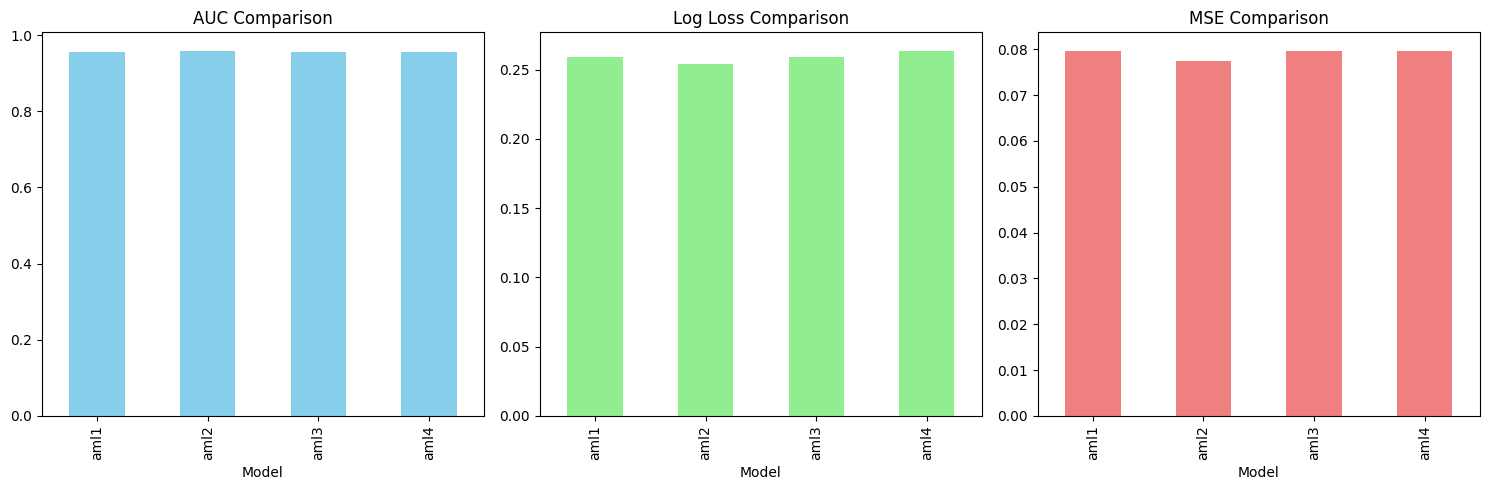

In [36]:
metrics_df = pd.DataFrame(metrics_data)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot AUC
metrics_df.plot(kind='bar', x='Model', y='AUC', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('AUC Comparison')

# Plot Log Loss
metrics_df.plot(kind='bar', x='Model', y='Log Loss', ax=axes[1], color='lightgreen', legend=False)
axes[1].set_title('Log Loss Comparison')

# Plot MSE
metrics_df.plot(kind='bar', x='Model', y='MSE', ax=axes[2], color='lightcoral', legend=False)
axes[2].set_title('MSE Comparison')

plt.tight_layout()
plt.show()

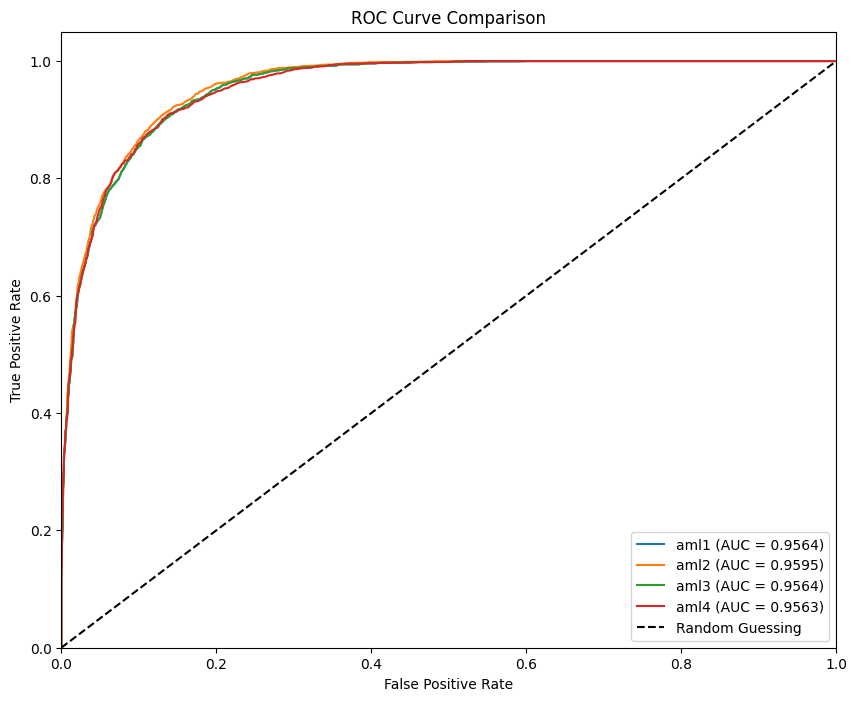

In [37]:
plt.figure(figsize=(10, 8))

for i, aml in enumerate(models):
    leader = aml.leader
    perf = leader.model_performance()  # Get model performance on the validation/test set
    fpr, tpr = perf.fprs, perf.tprs  # False Positive Rate and True Positive Rate
    plt.plot(fpr, tpr, label=model_names[i] + f' (AUC = {leader.auc():.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()